[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


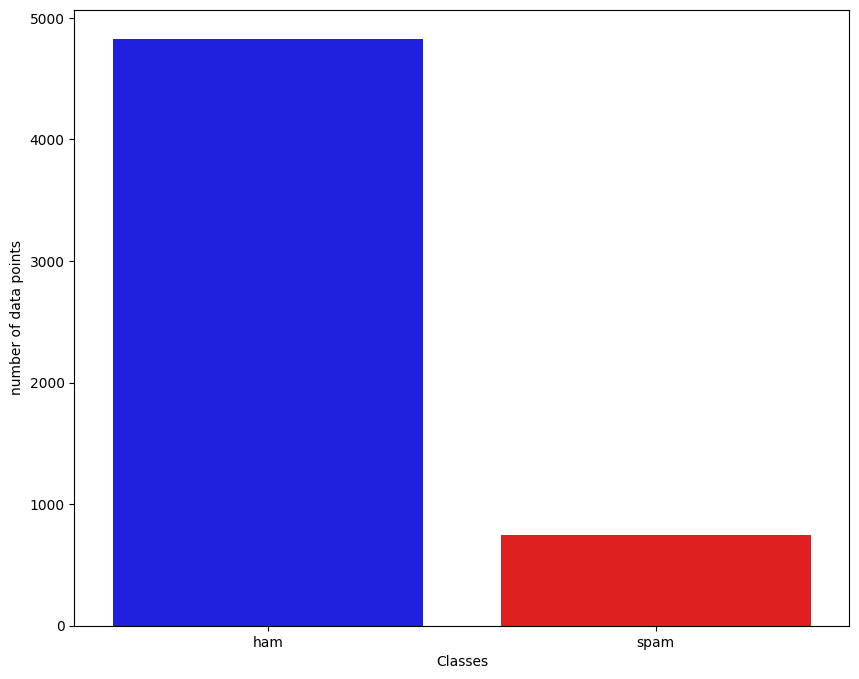

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk import sent_tokenize
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt_tab')
# Try reading the CSV file with a different encoding
try:
    data = pd.read_csv("spam.csv", encoding='latin-1')
except UnicodeDecodeError:
    # If latin-1 fails, try another common encoding like ISO-8859-1
    try:
        data = pd.read_csv("spam.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Could not decode the file with latin-1 or ISO-8859-1. You may need to determine the correct encoding of the file.")

to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop],axis = 1)
data.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
data.head()
data.info()
cols = ["blue","red"]
plt.figure(figsize=(10,8))
fg = sns.countplot(x = data["Target"],palette=cols)
fg.set_xlabel("Classes")
fg.set_ylabel("number of data points")
plt.savefig("countplot.png", bbox_inches='tight')

In [6]:
data['Target'].head()

,Target
0,ham
1,ham
2,spam
3,ham
4,ham


In [7]:
data["No_of_characters"] = data["Text"].apply(len)
data.head()

,Target,Text,No_of_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
data["No_of_words"] = data.apply(lambda row: nltk.word_tokenize(row["Text"]),axis=1).apply(len)
data.head()

,Target,Text,No_of_characters,No_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [9]:
data["No_of_sentences"] = data.apply(lambda row: nltk.sent_tokenize(row["Text"]),axis=1).apply(len)
data.head()

,Target,Text,No_of_characters,No_of_words,No_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentences,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Figure size 1200x800 with 0 Axes>

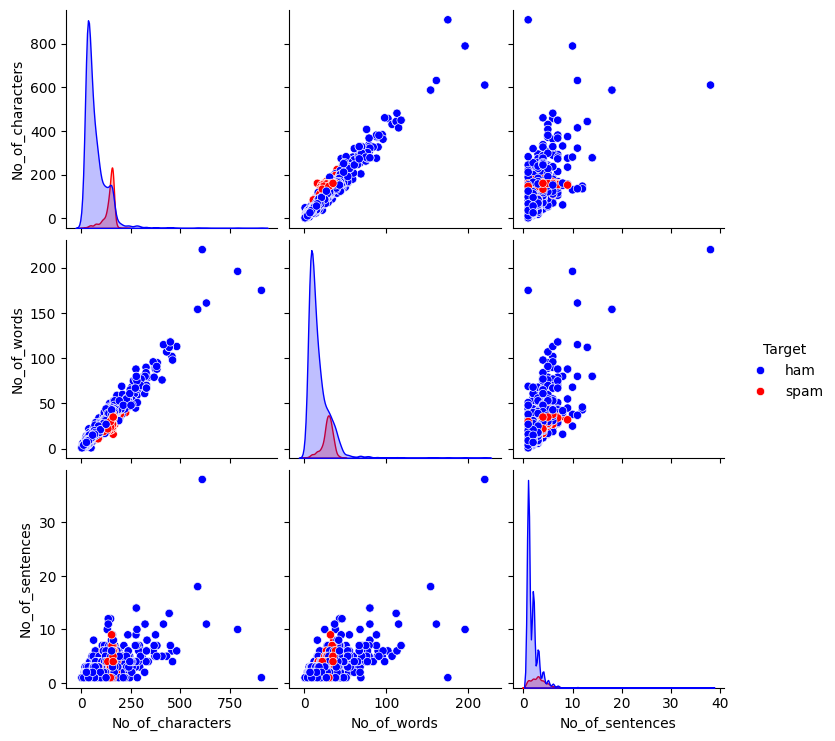

(5572, 5)

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data,hue="Target",palette=cols)
plt.show(fg)
plt.savefig("pairplot.png", bbox_inches='tight')
data.shape

In [12]:
#dropping the outliers
data = data[(data["No_of_characters"]<350)]
data.shape

(5548, 5)

In [13]:
data.head()

,Target,Text,No_of_characters,No_of_words,No_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Figure size 1200x800 with 0 Axes>

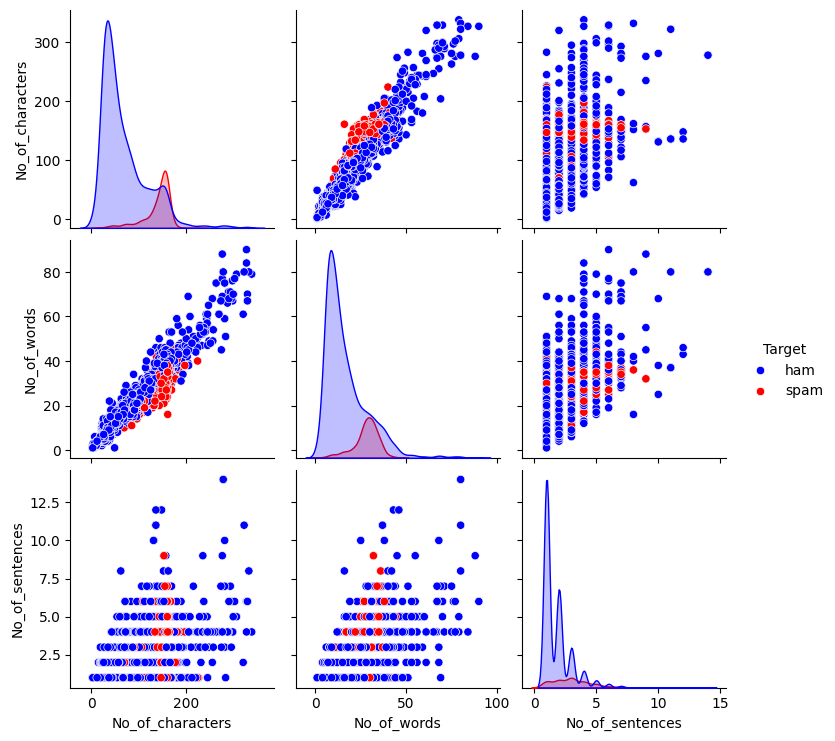

(5548, 5)

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data,hue="Target",palette=cols)
plt.show(fg)
plt.savefig("pairplot_no_outliers.png",bbox_inches = 'tight')
data.shape

In [16]:
#data preprocessing
#cleaning Text
print(data["Text"][:5])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object


In [17]:
import re
def clean(Text):
  sms = re.sub('[^a-zA-Z]',' ',Text) #replacing all non-alpha with space
  sms = sms.lower().split()
  sms = ' '.join(sms)
  return sms

data['clean_text'] = data["Text"].apply(clean)
print(*data["clean_text"][:5],sep='\n')

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


In [18]:
#tokenization

data['Tokenize_text'] = data.apply(lambda row: nltk.word_tokenize(row['clean_text']),axis=1)

print(*data['Tokenize_text'][:5],sep='\n')

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


In [19]:
nltk.download('stopwords')
def remove_stopwords(text):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  filtered_text = [words for words in text if words not in stop_words]
  return filtered_text

data['stopwords_text'] = data['Tokenize_text'].apply(remove_stopwords)

print(*data['stopwords_text'][:5],sep='\n')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [20]:
#lemmatization:
from nltk import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatizer_word(text):
  lemma = [lemmatizer.lemmatize(word,pos='v') for word in text]
  return lemma

data['lemmatize_text'] = data['stopwords_text'].apply(lemmatizer_word)

print(*data['lemmatize_text'][:5],sep='\n')
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


,Target,Text,No_of_characters,No_of_words,No_of_sentences,clean_text,Tokenize_text,stopwords_text,lemmatize_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


In [22]:
#vectorize the data using wordembedding or word2vec

corpus = []
for i in data['lemmatize_text']:
  msg = ' '.join([row for row in i])
  corpus.append(msg)

print(*corpus[:5],sep='\n')

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [25]:
#changing text data into numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus).toarray()
print(X)
print(X.shape)
X.dtype

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5548, 6490)


dtype('float64')

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Target'] = label_encoder.fit_transform(data['Target'])
data.head()

,Target,Text,No_of_characters,No_of_words,No_of_sentences,clean_text,Tokenize_text,stopwords_text,lemmatize_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


In [28]:
from sklearn.model_selection import train_test_split
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from random import Random
#Testing on the Classifiers
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
classifiers = [MultinomialNB(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]

# for cls in classifiers:
#   cls.fit(X_train,y_train)

pipe = RandomForestClassifier().fit(X_train,y_train)
pickle.dump(pipe,open("model.pkl","wb"))
# pipe_dict = {0:"Naive Bayes",1:"Random Forest",2:"KNN",3:"SVC"}

In [30]:
pipe = pickle.load(open("model.pkl","rb"))
sample = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845"]

# Before prediction, transform the sample text using the trained TfidfVectorizer
# You need to ensure that the `tfidf` object is available in this scope or loaded if saved.
# Assuming `tfidf` from cell ipython-input-27-3f34fd55f755 is still in memory:
sample_transformed = tfidf.transform(sample)

pred = pipe.predict(sample_transformed)
prob = pipe.predict_proba(sample_transformed)
print(pred)
print(prob)
for msg, p, prob in zip(sample,pred,prob):
  print(f" > {msg}")
  print(f''' -> {'SPAM' if p else 'HAM'}"(conf={prob[p]:0.2f})\n''')

[1]
[[0.04 0.96]]
 > Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845
 -> SPAM"(conf=0.96)



In [34]:
#model evaluation
from sklearn import metrics
precision = []
recall = []
f1_score = []
trainset_score = []
testset_score = []

for i in classifiers:
  i.fit(X_train,y_train) # Fit the classifier
  pred_train = i.predict(X_train)
  pred_test = i.predict(X_test)
  prec = metrics.precision_score(y_test,pred_test)
  recal = metrics.recall_score(y_test,pred_test)
  f1 = metrics.f1_score(y_test,pred_test)
  # train_accuracy = model.score(X_train,y_train) # Remove this line
  # test_accuracy = model.score(X_test,y_test) # Remove this line

  #appending Scores
  precision.append(prec)
  recall.append(recal)
  f1_score.append(f1)
  # trainset_score.append(train_accuracy) # Remove this line
  # testset_score.append(test_accuracy) # Remove this line

In [36]:
#init data of lists

data = {'Precision':precision, 'Recall': recall, "F1score": f1_score}

res = pd.DataFrame(data,index=["Naive Bayes","Random Forest","KNN","SVC"])
display(res)

,Precision,Recall,F1score
Naive Bayes,1.000000,0.705882,0.827586
Random Forest,1.000000,0.808824,0.894309
KNN,0.977778,0.323529,0.486188
SVC,0.990909,0.801471,0.886179


In [37]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["blue","red"])
res.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score
Naive Bayes,1.000000,0.705882,0.827586
Random Forest,1.000000,0.808824,0.894309
KNN,0.977778,0.323529,0.486188
SVC,0.990909,0.801471,0.886179


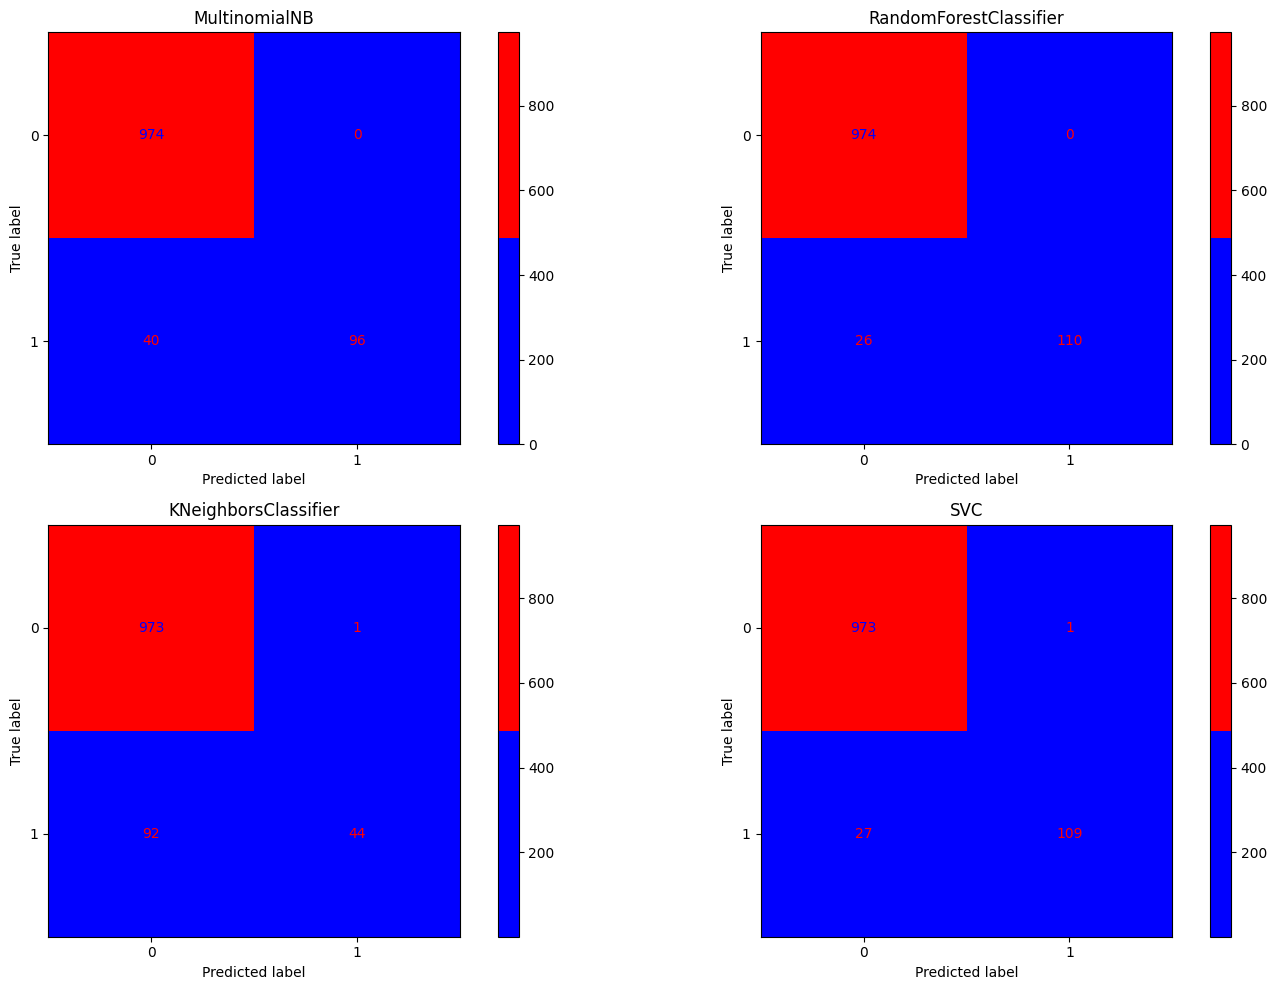

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap = ListedColormap(["blue", "red"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    # Calculate the confusion matrix first
    cm = confusion_matrix(y_test, cls.predict(X_test))
    # Use ConfusionMatrixDisplay to plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
    disp.plot(ax=ax, cmap=cmap)
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()
plt.savefig("confusion_matrix.png", bbox_inches='tight')
plt.show()